<a href="https://colab.research.google.com/github/MSimonFRA-UAS/LfDFra-UAS/blob/main/Hoeffding_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def toss(num_flips):
    heads = np.zeros(num_flips) 
    heads[np.random.uniform(size=num_flips) > 0.5] = 1
    return heads


def run_experiment(num_coins, num_flips, output):
    sum_heads = np.zeros(num_coins) 
    for k in range(num_flips):
        sum_heads = sum_heads + toss(num_coins)
    freq_heads = sum_heads/num_flips
    c1 = freq_heads[0]
    c2 = freq_heads[np.random.choice(num_coins)] 
    c3 = freq_heads[np.argmin(sum_heads)]
    if output:
      print('Frequency of first coin: {}'.format(c1))
      print('Frequency of second coin: {}'.format(c2))
      print('Frequency of third coin: {}'.format(c3))
    return c1,c2,c3


def Hoeffding_bound(epsilon, N):
    return 2.0*np.exp(-2.0*N*epsilon**2)

In [38]:
num_coins = 1000
num_flips = 10
run_experiment(num_coins, num_flips, 1)

Frequency of first coin: 0.4
Frequency of second coin: 0.5
Frequency of third coin: 0.1


(0.4, 0.5, 0.1)

In [39]:
num_repetitions = 1000000
c1_vec, c2_vec, c3_vec = [],[],[]
printcounter = 0
for k in range(num_repetitions):
    c1,c2,c3 = run_experiment(num_coins, num_flips,0)
    c1_vec.append(c1)
    c2_vec.append(c2)
    c3_vec.append(c3)
    if (printcounter == 100000):
        print('Number of repetitions done: {}'.format(k))
        printcounter = 0
    printcounter +=1

Repetition: 100000
Repetition: 200000
Repetition: 300000
Repetition: 400000
Repetition: 500000
Repetition: 600000
Repetition: 700000
Repetition: 800000
Repetition: 900000


(array([6.23618e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.76359e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.30000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ]),
 <BarContainer object of 10 artists>)

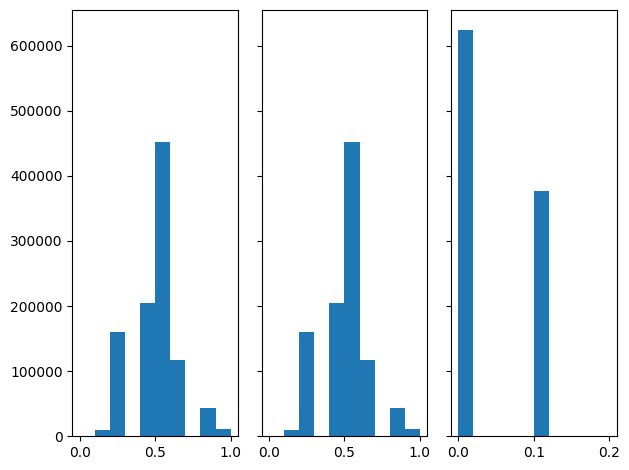

In [40]:
fig, axs = plt.subplots(1,3,sharey=True, tight_layout=True)
num_bins = 10
axs[0].hist(c1_vec,bins=num_bins)
axs[1].hist(c2_vec,bins=num_bins)
axs[2].hist(c3_vec,bins=num_bins)

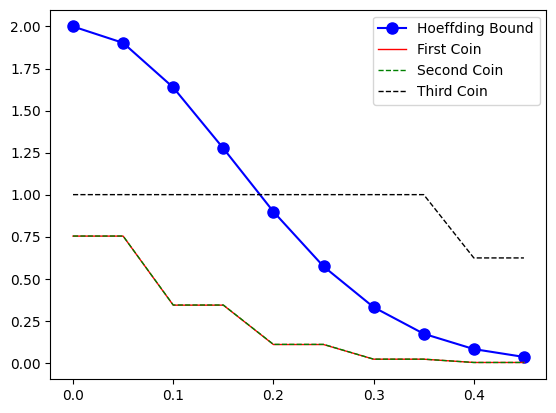

In [41]:
eps_vec = np.arange(0.0,0.5,0.05)
bound = Hoeffding_bound(eps_vec, num_flips)
c1_err = np.abs(np.array(c1_vec)-0.5)
c2_err = np.abs(np.array(c2_vec)-0.5)
c3_err = np.abs(np.array(c3_vec)-0.5)

prob1_vec, prob2_vec, prob3_vec = np.zeros(len(eps_vec)),np.zeros(len(eps_vec)),np.zeros(len(eps_vec))

for idx in range(eps_vec.shape[0]):
    eps = eps_vec[idx]
    prob1_vec[idx] = np.sum(c1_err > eps)/num_repetitions
    prob2_vec[idx] = np.sum(c2_err > eps)/num_repetitions
    prob3_vec[idx] = np.sum(c3_err > eps)/num_repetitions

  
plt.plot(eps_vec, bound, marker='o', markerfacecolor='blue', markersize=8, color='b', label='Hoeffding Bound')
plt.plot(eps_vec, prob1_vec, marker='', color='r', linewidth=1, label='First Coin')
plt.plot(eps_vec, prob2_vec, marker='', color='g', linewidth=1, linestyle='dashed', label='Second Coin')
plt.plot(eps_vec, prob3_vec, marker='', color='k', linewidth=1, linestyle='dashed', label='Third Coin')
plt.legend()